Image Segmentation is the process of locating objects and boundaries in an image.
Lets use K-Means clustering for this task.

In [2]:
# Import the required pckages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

<ipython-input-3-bae8674e6bdc>:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img = plt.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png')


The image is 490 px by 487px


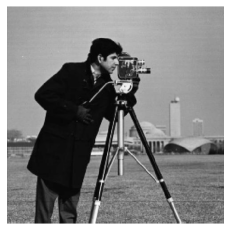

In [3]:
# Load the dataset which is an image in RGB colors.
img = plt.imread('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png')
print(f"The image is {img.shape[0]} px by {img.shape[1]}px")
plt.axis('off')
plt.imshow(img)

In [4]:
# Segmenting the image using 2 clusters
k = 2
X = img.reshape(-1, 1)
km = KMeans(n_clusters=2, random_state=42)
km.fit(X)

KMeans(n_clusters=2, random_state=42)

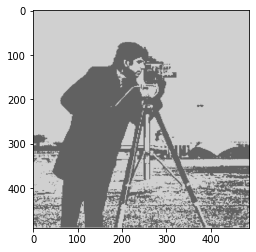

In [5]:
# Lets replace each pixel with the mean of the cluster it belongs to
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape)
plt.imshow(seg)

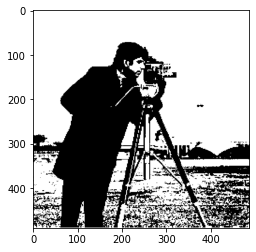

In [6]:
# Alternatively we can view our image in Black and white
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)